In [1]:
import numpy as np
import matplotlib.pyplot as plt
import exoplanet as exo
import theano.tensor as T

In [2]:
t0 = 2.003
period = 5.897
b = 0.34
duration = 0.091
rp = 0.07

t = np.arange(0, 3*period, 0.5/24)
u = [0.3, 0.2]

/Users/research/projects/exo-dev/exo-dev-venv/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{add,no_inplace}(TensorConstant{[[[1.22709..480e+00]]]}, TensorConstant{(1, 18, 7)..0000000002})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/Users/research/projects/exo-dev/exo-dev-venv/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/Users/research/projects/exo-dev/exo-dev-venv/lib/python3.7/site-packages/theano/tensor/opt.py", line 

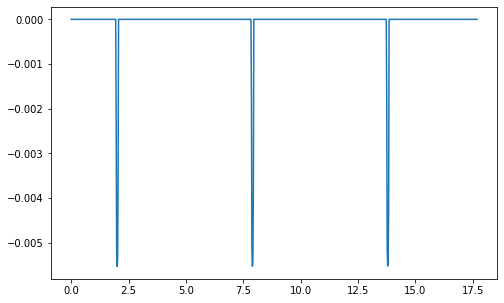

In [6]:
tdvs = np.zeros(3)
transit_durs = np.ones(3)*duration

#orbit = exo.orbits.TDVOrbit(t0=t0, period=period, b=b, duration=duration)
#orbit = exo.orbits.TDVOrbit(t0=t0, period=period, b=b, duration=[duration], tdvs=[tdvs])
orbit = exo.orbits.TDVOrbit(t0=t0, period=period, b=b, transit_durs=[transit_durs])

light_curve = exo.LimbDarkLightCurve(u).get_light_curve(orbit=orbit, r=rp, t=t, texp=0.5/24).eval()

plt.figure(figsize=(8,5))
plt.plot(t, light_curve)
plt.show()

In [4]:
# supplying tdvs seems to be working
orbit = exo.orbits.TDVOrbit(t0=t0, period=period, b=b, duration=[duration], tdvs=[tdvs])
orbit.tdvs[0].eval()

array([0., 0., 0.])

In [5]:
# supplying transit_durs isn't working
orbit = exo.orbits.TDVOrbit(t0=t0, period=period, b=b, transit_durs=[transit_durs])
orbit.tdvs[0].eval()

array([-1.38777878e-17, -1.38777878e-17, -1.38777878e-17])